In [1]:
# install pytorch
!pip3 install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu116
    
# show what we got
!pip list

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu116
Package                       Version
----------------------------- --------------------
absl-py                       1.4.0
aiohttp                       3.8.1
aiosignal                     1.2.0
alabaster                     0.7.12
ale-py                        0.7.4
anaconda-client               1.9.0
anaconda-navigator            2.1.4
anaconda-project              0.10.2
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.2
astroid                       2.6.6
astropy                       5.0.4
asttokens                     2.0.5
async-timeout                 4.0.1
atomicwrites                  1.4.0
attrs                         21.4.0
Automat                       20.2.0
autopep8                      1.6.0
AutoROM                       0.4.2
AutoROM.accept-rom-license   

In [2]:
# install stable-baslines (implementations of reinforcement learning algorithms in PyTorch)
!pip install stable-baselines3[extra] protobuf==3.20.*

In [3]:
# install pydirectinput for input handaling
!pip install pydirectinput

In [151]:
# install pytesseract for OCR
!pip install pytesseract
# set tessoract locations
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

In [5]:
# instal mss for image capture
!pip install mss

In [6]:
# screen capture
from mss import mss
# command sending 
import pydirectinput
# fram proccesing
import cv2
# transformatinoal framework
import numpy as np
# OCR for game extraction
import pytesseract
# visualize captures
from matplotlib import pyplot as plt
# pause time
import time
# env componenet
from gym import Env
# box for the image, descrete for possible actions
from gym.spaces import Box, Discrete

In [188]:

class game(Env):
    # set env action and obser shaps
    def __init__(self):
        # use the base class
        super().__init__()
        # setup spaces
        self.observ_space = Box(low=0, high=255, shape=(1,83,100), dtype=np.uint8)
        self.action_space = Discrete(3)
        # def extraction parameters
        self.cap = mss()
        self.game_location = {'top':300, 'left':500, 'width':400, 'height':400}
        self.done_location = {'top':405, 'left':800, 'width':330, 'height':80}
        
    # called to do somehitng in the game     
    def step(self, action):
        # actions: 0 - space(jump), 1 - down(duck), 2 - no action(no op) 
        action_map = {0: 'space', 1: 'down', 2: 'no_op'}
    
        # simulate press if not no_op
        if action != 2:
            pydirectinput.press(action_map[action])
    
        # check for gameover
        done, done_cap = self.env.get_done()
        # check next observ
        new_observ = self.get_observation()
        # reward - get point for each frame that isn't gameover
        reward = 1
        #info dic
        info = {}
        return new_observ, reward, done, 
    # vusualize the game
    def render(self):
        cv2.imshow('Game', np.array(self.cap.grab(self.game_location))[:,:,:3])
        if cv2.waitkey(1) & 0xFF == ord('q'):
            self.close()
    # closes the done observ
    def close(self):
        cv2.destoryAllWindows()
    # restart the game     
    def reset(self):
        time.sleep(1)
        pydirectinput.click(x=150, y=150)
        pydirectinput.press('space')
        return self.get_observ()

    # get a part of the observation that we want
    def get_observ(self):
        # get screen capture (only first 3 cahnnels) and extract the values from it
        raw = np.array(self.cap.grab(self.game_location))[:,:,:3]
        # grayscale
        gray = cv2.cvtColor(raw, cv2.COLOR_BGR2GRAY)
        # resize
        resized = cv2.resize(gray, (100,83))
        # add channels first 
        channel = np.reshape(resized, (1, 83, 100))
        return channel
    # get the done text with OCR
    def get_done(self):
        # get done screen
        done_cap = np.array(self.cap.grab(self.done_location))[:,:,:3]
        # valid done text
        done_str = ['GAME','GAHE']
        
        # Apply OCR
        # flag to recognize gameover
        done = False
        # get string
        res = pytesseract.image_to_string(done_cap)[:4]
        if res in done_str:
            # found gameover
            done = True
        # return game status
        return done, done_cap

In [189]:
env = game()

In [169]:
done, done_cap = env.get_done()

In [170]:
done

True

In [190]:
env.render()

AttributeError: module 'cv2' has no attribute 'waitkey'

In [103]:
# observ values
env.get_observ()

array([[[ 48,  48,  48, ...,  44, 151, 102],
        [ 48,  48,  48, ...,  48,  48,  48],
        [ 48,  48,  48, ...,  48,  48,  48],
        ...,
        [ 61,  61,  61, ...,  61,  61,  61],
        [ 61,  61,  61, ...,  61,  61,  61],
        [ 61,  61,  61, ...,  61,  61,  61]]], dtype=uint8)

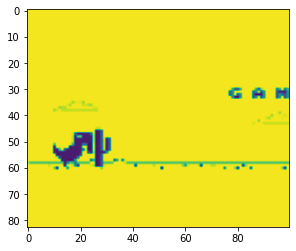

In [105]:
# observ after proccecing
plt.imshow(env.get_observ()[0])

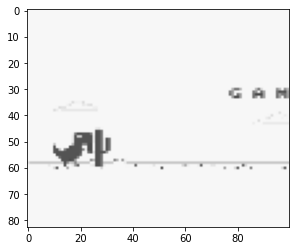

In [107]:
# observ after proccecing it back to the original
plt.imshow(cv2.cvtColor(env.get_observ()[0], cv2.COLOR_BGR2RGB))